# Data processing

Here I'm generating non-upsampled matrices from dataset without album duplicates. I'll read these files in python and upsample to 16.

In [30]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")

In [34]:
dissim_gen = function(data){
    dt <- split(data, data$album_id)
    for(i in 1:length(dt)) { 

        dt[[i]] = tidyr::pivot_wider(dt[[i]], 
                  names_from = album_id, 
                  values_from = c(valence, energy, loudness, tempo)) 

        dt[[i]] = dt[[i]][, 2:5]

        dt[[i]] <- as.matrix(dt[[i]]) 

        dt[[i]] <- as.matrix(daisy(dt[[i]]))

        dt[[i]][dt[[i]] == 0] <- NA

    }
    return(dt)
}

In [35]:
lista = dissim_gen(dissim_matrix)

In [36]:
setwd("/home/pasoneto/Documents/Ciência/PhD/data/third_set/dissim_matrices")
for(i in 1:length(lista)){
    write.csv(lista[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
}

## Calculating means for upsampled matrice

In [102]:
file_list <- list.files(path="/home/pasoneto/Documents/Ciência/PhD/data/third_set/dissim_matrices_upsampled")
matrices = c()

for(i in 1:length(file_list)){
    file = paste("/home/pasoneto/Documents/Ciência/PhD/data/third_set/dissim_matrices_upsampled/", file_list[i], sep = "")
    matrices[[i]] = as.matrix(fread(file, header = TRUE))
}

In [113]:
dt <- apply(simplify2array(matrices), 1:2, function(x){mean(x, na.rm = TRUE)})
redblack = colorRampPalette(c("red", "black"))(100)

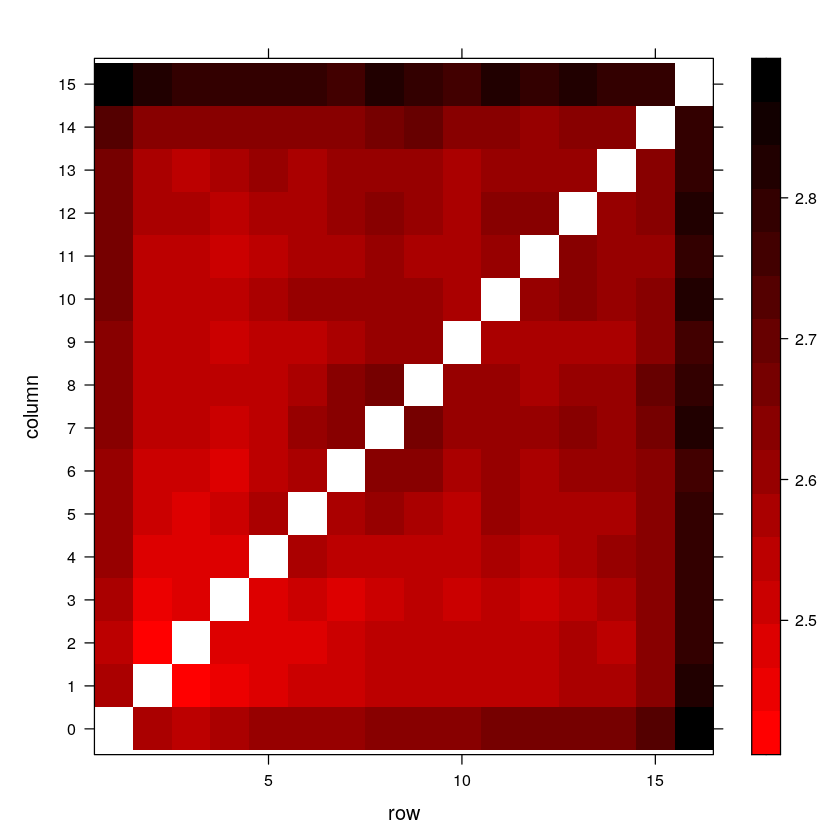

In [115]:
levelplot(dt, col.regions = redblack)